<a href="https://colab.research.google.com/github/Hyenni/practice_colab/blob/housing/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import tarfile
from six.moves import urllib

In [0]:
DATA_DIR = "./datasets"

#디렉토리 만들기
if not os.path.isdir(DATA_DIR):
  os.makedirs(DATA_DIR)
  
#housing.tgz 다운로드
DATA_PATH = os.path.join(DATA_DIR, 'housing.tgz')
urllib.request.urlretrieve("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz", DATA_PATH)

#압축 풀기
tgz_file = tarfile.open(DATA_PATH)
tgz_file.extractall(path=DATA_DIR)
tgz_file.close()


In [0]:
#csv 파일 읽기
import pandas as pd

def load_data(file_dir=DATA_DIR):
    csv_file = os.path.join(file_dir, 'housing.csv')
    return pd.read_csv(csv_file)
  
housing = load_data()

In [4]:
type(housing)

pandas.core.frame.DataFrame

In [5]:
#처음 5개의 행 살펴보기
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [6]:
!ls -al

total 20
drwxr-xr-x 1 root root 4096 Nov 28 01:42 .
drwxr-xr-x 1 root root 4096 Nov 28 01:39 ..
drwxr-xr-x 4 root root 4096 Nov 20 18:06 .config
drwxr-xr-x 2 root root 4096 Nov 28 01:42 datasets
drwxr-xr-x 2 root root 4096 Nov 20 18:17 sample_data


In [7]:
#데이터에 대한 간략한 설명 보기
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#범주형(object) 데이터의 카테고리 확인
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
#숫자형 데이터 살펴보기 (summary)
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

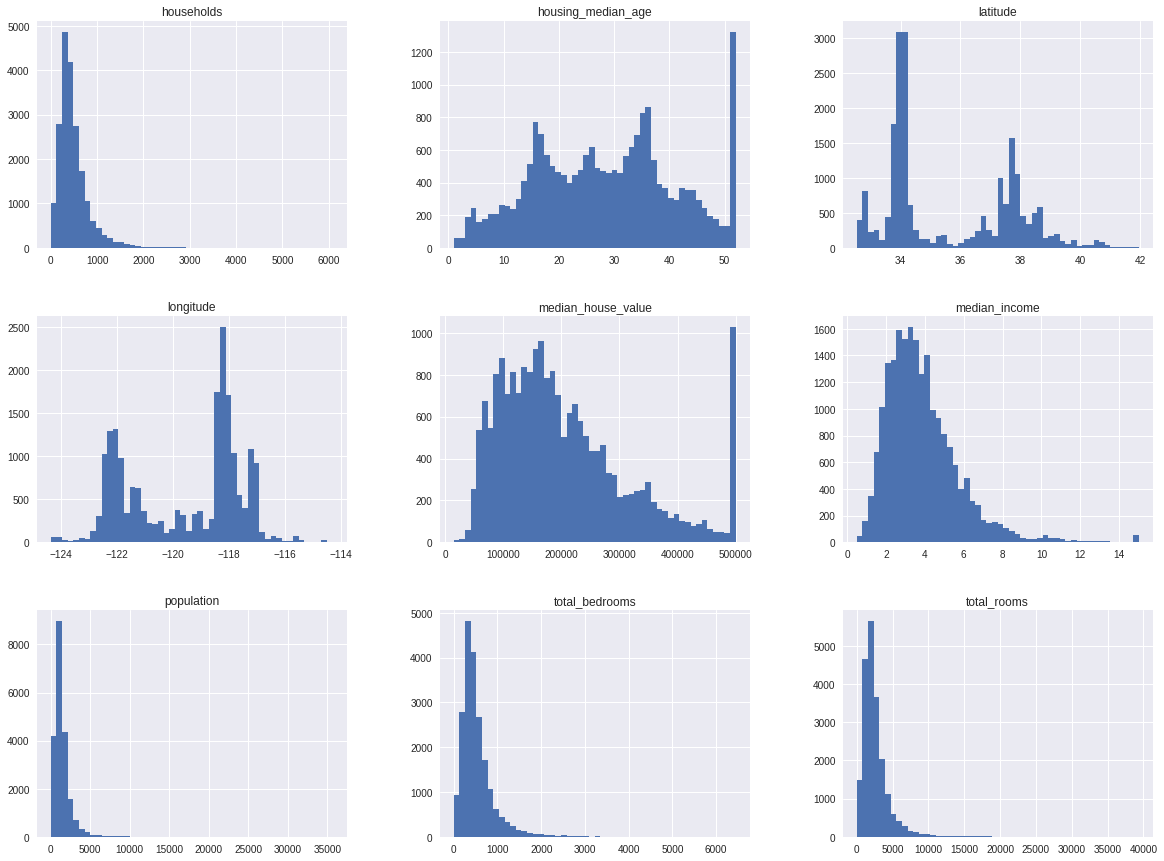

In [10]:
#histogram, 숫자형 데이터 특성을 빠르게 검토
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
#테스트 데이터 셋 만들기
#테스트용 데이터를 별도 저장함으로 데이터 스누핑 편향(Data snooping bias) 현상 방지 (테스트 셋 학습 방지)

from sklearn.model_selection import train_test_split

#train : test = 80 : 20
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print("train: {}, test: {}".format(len(train_set), len(test_set)))

train: 16512, test: 4128


In [12]:
#계층적 샘플링
#테스트 셋이 전체 모수를 대표하도록 각 계층에서 올바른 수의 샘플을 추출 
#소득이 주택 가격을 예측하는데 중요하다면? -> 각 소득에서 일정한 비율로 골고루 샘플링

#소득의 카테고리 만들기
#1.5: 소득 카테고리 수를 제한하기 위한 값
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["median_income"].head(), housing["income_cat"].head()

(0    8.3252
 1    8.3014
 2    7.2574
 3    5.6431
 4    3.8462
 Name: median_income, dtype: float64, 0    6.0
 1    6.0
 2    5.0
 3    4.0
 4    3.0
 Name: income_cat, dtype: float64)

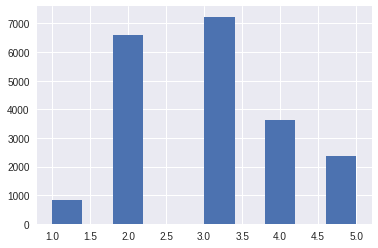

In [13]:
#5 이상인 값은 5로 합침
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

housing["income_cat"].hist()

In [14]:
#계층 샘플링
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]
  
#소득 카테고리 비율 살펴보기
housing["income_cat"].value_counts() / len(housing)

##전체적으로 8:2의 샘플링이 아니라, 계층을 각각 8:2의 비율로 샘플링을 한다 (데이터 분포를 고려)
##한쪽으로 치우쳐 있는 데이터 분포를 가지고 있다면 ==> StratifiedShuffleSplit
##그렇지않으면 어느 한 계층은 학습을 하지 못할 수도 있다

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

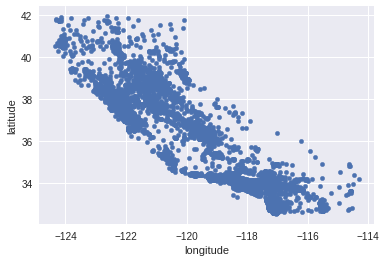

In [15]:
#데이터 탐색 & 시각화
#훈련 데이터 복사
housing = strat_train_set.copy()

#위도, 경도에 따른 산점도 그리기
housing.plot(kind="scatter", x="longitude", y="latitude")

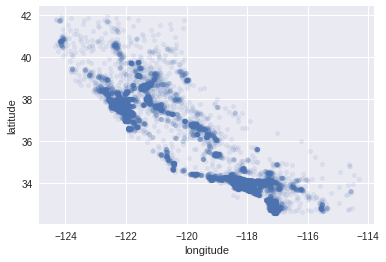

In [16]:
#alpha 옵션: 밀집 지역은 더 진하게 표현
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

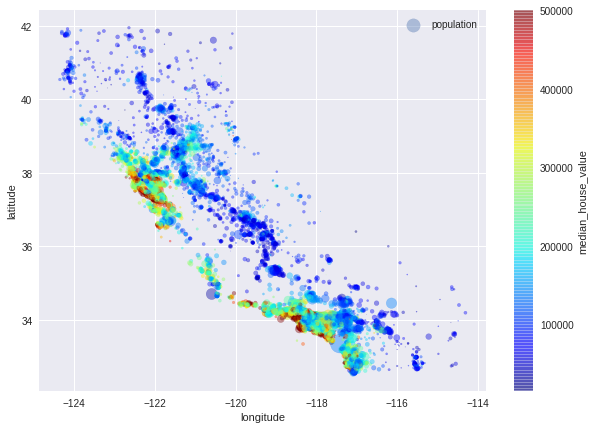

In [17]:
#원의 크기(s): 구역의 인구
#색(c): 주택 가격
#컬러 맵: jet, 파란색(낮은가격) -----> 빨간색(높은 가격)

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

In [0]:
#탐색
#주택 가격은 지역과 인구 밀도에 관련이 크다 (바다와 인접한 곳)

#북부 해안가는 주택 가격이 그리 높지 않음 (다른 규칙을 찾을 필요가 있음)

In [19]:
#상관관계 조사하기
#표준 상관 계수 (Standard Correlation Coefficeint; Pearson r) 계산

housing.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   
income_cat          -0.016243 -0.078848           -0.139385     0.221690   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_median_age       -0.325047   -0.298710   -0.306428      -0.111360   
total_rooms               0.929379    0.855109    0.918392       0.200087   
total_bedrooms            1.000000    0.876320    0.980170      -0.009740   
population                0.876320    1.000000    0.904637       0.002380   
households                0.980170    0.904637    1.000000       0.010781   
median_income            -0.009740    0.002380    0.010781       1.000000   
median_house_value        0.047689   -0.026920    0.064506       0.687160   
income_cat                0.012502    0.022848    0.034995       0.902156   

                    median_house_value  income_cat  
longitude                    -0.047432   -0.016243  
latitude                     -0.142724   -0.078848  
housing_median_age            0.114110   -0.139385  
total_rooms                   0.135097    0.221690  
total_bedrooms                0.047689    0.012502  
population                   -0.026920    0.022848  
households                    0.064506    0.034995  
median_income                 0.687160    0.902156  
median_house_value            1.000000    0.642274  
income_cat                    0.642274    1.000000

In [20]:
#주택 가격과 다른 특성 사이의 상관관계 크기 보기
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e142db898>,
      dtype=object)

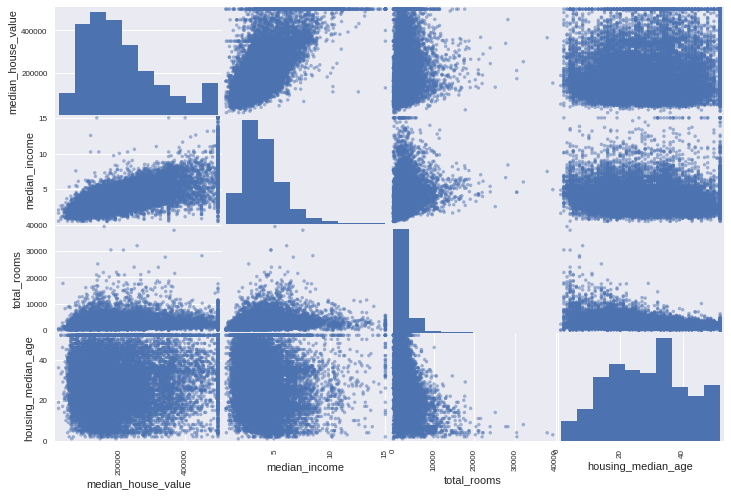

In [21]:
#상관관계 산점도 
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))

In [0]:
#대각선은 각 특성의 히스토그램을 의미한다

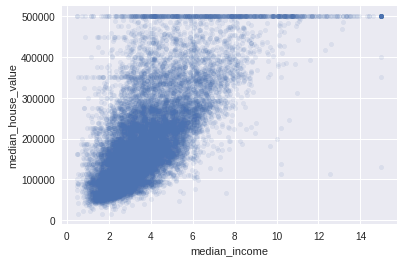

In [23]:
#주택 가격과 상관도가 가장 높은 중간 소득의 상관관계 산점도 그리기

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [0]:
#상관관계가 매우 강함
#가격이 500000에 제한
#수평선으로 보이는 구간 제거 필요

In [0]:
#특성들의 조합

#방 갯수, 가구 당 방 갯수
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

#침대 갯수, 방 갯수 대비 침대 갯수
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]

#인구, 가구 수에 대한 인구 수
housing["population_per_household"] = housing["population"]/housing["households"]

In [26]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [0]:
#total_bedrooms, bedrooms_per_room 상관계수 주목
#침대/방의 비율이 낮은 집이 더 비쌈

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e18cb0860>,
      dtype=object)

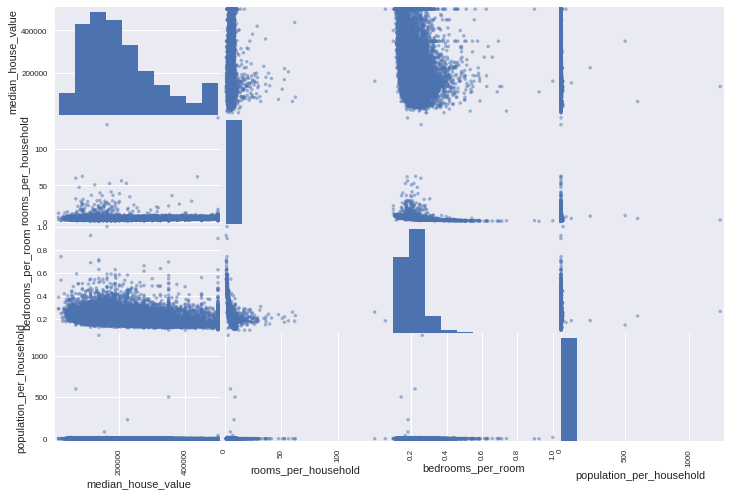

In [28]:
#상관관계 산점도2
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "rooms_per_household", "bedrooms_per_room", "population_per_household"]

scatter_matrix(housing[attributes], figsize=(12,8))

In [29]:
#알고리즘용 데이터 준비
#데이터 정제: 누락된 특성에 대한 처리 (결측치 처리)

#median_house_value을 빼고 가져옴
#예측을 하고 median_house_value의 실제 label과 비교하기 위해 데이터 셋에서는 삭제, 다른 곳에 복사해 놓음
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16354
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [30]:
#1. 특정 값으로 채우기 (0, 평균값, 중간값 ...)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
housing.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [31]:
#2. 해당 구역을 제거 (행 삭제) 
housing2 = housing.dropna(subset=["total_bedrooms"])
housing2.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [32]:
#3. 전체 특성을 삭제 (열 삭제)
housing2 = housing.drop("total_bedrooms", axis=1)
housing2.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [33]:
!ls -al

total 20
drwxr-xr-x 1 root root 4096 Nov 28 01:42 .
drwxr-xr-x 1 root root 4096 Nov 28 01:39 ..
drwxr-xr-x 4 root root 4096 Nov 20 18:06 .config
drwxr-xr-x 2 root root 4096 Nov 28 01:42 datasets
drwxr-xr-x 2 root root 4096 Nov 20 18:17 sample_data


In [34]:
#누락된 값에 대한 처리 (imputer)

from sklearn.preprocessing import Imputer

#중간값으로대체하는 객체 생성
imputer = Imputer(strategy="median")

#수치형 데이터만 선택
housing_num = housing.drop("ocean_proximity", axis=1)

#학습 및 변환
imputer.fit(housing_num)
X = imputer.transform(housing_num)

#pandas DataFrame으로 변환
housing_df = pd.DataFrame(X, columns=housing_num.columns, index=list(housing.index.values))

housing_df.count()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
income_cat            16512
dtype: int64

In [0]:
#fillna vs Imputer (strategy = mean, median, most_frequent, constant)
#fillna => 특정 컬럼을 지정하여 채움
#Imputer => 특정 컬럼을 지정하지 않음, 전체 데이터 프레임에 대해서 한번에 missing value(NULL)값 처리

#fit() => 중간값을 계산
#transform() => 계산된 값으로 대체

In [36]:
#텍스트와 범주형 데이터 다루기
#ocean_proximity

#카테고리 텍스트를 숫자로 바꾸기
#pd.factorize() => 카테고리를 정수값으로 매핑

housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [37]:
#사전처럼 각각 0번부터 숫자 부여 

housing_cat.factorize()

(array([0, 0, 1, ..., 2, 0, 3]),
 Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object'))

In [38]:
#숫자와 텍스트를 분리

housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0])

In [39]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [40]:
#factorize() 문제점
#단순히 정수형 숫자로 표현되었기 때문에 (숫자는 크기/거리를 함축하고 있다고 생각) 가까이 있는 두 값이 더 비슷하다고 생각한다

#해결 방법: One-hot encoding 사용!!!
#one_hot_encoding의 장점: 거리에 관계를 다 없앰

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

#fit_transform()에는 2차원 배열을 넣어야함
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

#출력은 sparse matrix
#cf. sparse matrix: 수 천개의 카테고리를 가진 경우, 1은 하나이고 나머지는 0이므로 0을 다 저장하지 않고 1의 위치만 저장하여 메모리 절약
housing_cat_1hot

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [41]:
#shape : (16354, 5)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [59]:
#텍스트 카테고리 -> 숫자 카테고리(factorize) -> one_hot_encoding 과정을 한번에 처리

#2차원(DataFrame) : reshape(-1,1)과 같은 효과
housing_cat_2d = housing[["ocean_proximity"]]

#default : sparse=True
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_2d)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [0]:
#특정 스케일링: 입력 값들의 스케일이 크게 다르면 알고리즘이 잘 작동하지 않음
#ex) total_rooms: 6 ~ 39320, median_income: 0 ~ 15

#1. 정규화 => 모든 특성의 범위를 같게 만드는 방법, min_max scaling (sklearn.MinMaxScaler())
#2. 표준화 => 평균 0, 분산 1이 되도록 만드는 방법 (sklearn.StandardScaler())

In [60]:
#파이프라인: 연속된 변환을 순서대로 처리할 수 있도록 도와줌
#imputer + scaler

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', Imputer(strategy="median")),('scaler', StandardScaler()),])

housing_num_tr = num_pipeline.fit_transform(housing_num)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [61]:
#파이프라인 결과 합치기 
#(imputer + scaler) + onehotencoder

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat", OneHotEncoder(), cat_attribs), ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


(16512, 14)

In [46]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.1)


In [47]:
import sklearn
sklearn.__version__

'0.20.1'

In [0]:
#compose 모듈이 없다는 에러가 난다면 scikit-learn의 버전을 upgrade해줌으로 해결한다
#그리고 커널을 restarting하여 refresh해줘야 버전이 업데이트 된 것을 확인할 수 있다

In [56]:
#모델 선택 & 모델 학습 (Training)
#선형 회귀 모델
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

#학습
#y = wx + b (w, b를 학습)
lin_reg.fit(housing_prepared, housing_labels)

#예측
sample_data = housing.iloc[:5]
sample_labels = housing_labels.iloc[:5]

#위에서 만든 pipeline을 통해 숫자로 변경하고, scale을 변형하는 과정을 반드시 거쳐야 한다 (raw data 데이터 정제 필수!!!)
sample_data_prepared = full_pipeline.transform(sample_data)

print("predict:\n{}".format(lin_reg.predict(sample_data_prepared)))
print("target:\n{}".format(list(sample_labels)))

predict:
[205841.96139906 329060.05217695 205219.96047357  61859.01340291
 196908.23636333]
target:
[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [52]:
#평가 (RMSE: Root Mean Squared Error, 평균 제곱근 오차)

from sklearn.metrics import mean_squared_error

housing_predict = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68867.01067610044

In [0]:
#과소적합
#특성들이 충분한 정보를 제공하지 못하고 있으며, 모델이 충분히 강력하지 못함

#더 강력한 모델 선택, 더 좋은 특성 주입, 모델의 규제를 감소하는 등의 해결방안을 선택

In [54]:
#다른 모델 선택
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

#모델 선택
tree_reg = DecisionTreeRegressor()

#모델 학습
tree_reg.fit(housing_prepared, housing_labels)

#예측
housing_predict = tree_reg.predict(housing_prepared)

#평가
tree_mse = mean_squared_error(housing_labels, housing_predict)

tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [57]:
#과대적합(overfittiong) - validation dataset으로 확인 필요

#교차 검증 (K-Fold cross validation)
#훈련 데이터셋을 K개의 서브셋으로 랜덤하게 분할
#K-1개의 서브셋으로 학습시키고 나머지 1개의 서브셋으로 검증
#위 과정을 K번 학습

from sklearn.model_selection import cross_val_score

#Linear regression
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
scores_rmse = np.sqrt(-scores)
print("LinearRegression score:", scores_rmse.mean())

#Decision tree
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
scores_rmse = np.sqrt(-scores)
print("DecisionTree score:", scores_rmse.mean())

LinearRegression score: 69049.01752253593
DecisionTree score: 69825.90263885265


In [58]:
#선형 회귀 모델이 더 좋은 성능을 나타냄

#앙상블 모델 (여러 개의 다른 모델들을 모아서 학습)
#Random Forest

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
scores_rmse = np.sqrt(-scores)
print("RandomForest score:", scores_rmse.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest score: 51702.25021779128


In [65]:
#모델 튜닝
#찾은 모델들에 대해 가장 성능이 좋은 파라미터 조합을 찾아냄

from sklearn.model_selection import GridSearchCV

#파라미터 조합
#n_estimators: 조합할 tree 갯수
#max_features: split에 사용할 feature 수
#bootstrap: 랜덤 샘플링 유무

param_grid = [{'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
             {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}]

forest_reg = RandomForestRegressor()

#grid search
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [0]:
#3 * 4 = 12개의 조합
#2 * 3 = 6개의 조합
#전체 훈련 횟수 = (12 + 6) * 5 - folds = 90

In [63]:
#최적값 확인
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [64]:
#score 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score),params)

64290.037772700096 {'max_features': 2, 'n_estimators': 3}
56164.59387623082 {'max_features': 2, 'n_estimators': 10}
53957.79097535935 {'max_features': 2, 'n_estimators': 30}
61563.330709023925 {'max_features': 4, 'n_estimators': 3}
54074.710749998165 {'max_features': 4, 'n_estimators': 10}
52405.77946098967 {'max_features': 4, 'n_estimators': 30}
61114.02484236946 {'max_features': 6, 'n_estimators': 3}
53593.620318130124 {'max_features': 6, 'n_estimators': 10}
51722.03256477245 {'max_features': 6, 'n_estimators': 30}
59667.245232617584 {'max_features': 8, 'n_estimators': 3}
53278.18622635636 {'max_features': 8, 'n_estimators': 10}
51283.77652130465 {'max_features': 8, 'n_estimators': 30}
62870.21372516331 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55203.80571320242 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61546.53315468315 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54391.28300453014 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [66]:
#솔루션 제시 (최종 모델 평가)
#최종 모델 선택
final_model = grid_search.best_estimator_

#test dataset으로 평가
X_test = strat_test_set.drop("median_house_value", axis=1)
Y_test = strat_test_set["median_house_value"].copy()

#전처리
X_test_prepared = full_pipeline.transform(X_test)

#최종 예측
final_predict = final_model.predict(X_test_prepared)

#평가
final_mse = mean_squared_error(Y_test, final_predict)
final_rmse = np.sqrt(final_mse)
final_rmse

48122.723494123005